# Importing and loading data

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
import warnings

from matplotlib.ticker import PercentFormatter
%matplotlib inline 
from scipy.stats import norm 
from scipy.stats import f_oneway



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from math import sqrt
from sklearn import metrics
from sklearn.metrics import r2_score
dash = '-'*150


## File Reading

In [4]:
redwine_file="../winequality-red.csv"
whitewine_file="../winequality-white.csv"

try:
    
    # Import the fireDataset.csv data:
    red_wine_dataframe = pd.read_csv(redwine_file)
    white_wine_dataframe = pd.read_csv(whitewine_file,sep=';')
    
except FileNotFoundError:
        print('File not found!!')

In [14]:
print("---------Red Wine CSV file info--------\n")
print(red_wine_dataframe.info())

print("\n--------White Wine CSV file info------- \n")
print(white_wine_dataframe.info())


---------Red Wine CSV file info--------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  wine_type             1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB
None

--------White Wi

# Nulls Check and Cleaning

In [15]:
print('\nCheck the number of null values in  each columns in Red Wine CSV\n')
print(red_wine_dataframe.isnull().sum())
print('\nCheck the number of null values in  each columns in White Wine CSV\n')
print(white_wine_dataframe.isnull().sum())



Check the number of null values in  each columns in Red Wine CSV

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

Check the number of null values in  each columns in White Wine CSV

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64


In [16]:
# creating new column for the wine type.
red_wine_dataframe['wine_type']='red'
white_wine_dataframe['wine_type']='white'


In [17]:
# get the number of duplicate values in each csv

print("Total number of duplicates in red wine dataframe:\t",red_wine_dataframe.duplicated().sum())
print("Total number of duplicates in white wine dataframe:\t",white_wine_dataframe.duplicated().sum())


Total number of duplicates in red wine dataframe:	 240
Total number of duplicates in white wine dataframe:	 937


In [18]:
wines_df=pd.concat([red_wine_dataframe,white_wine_dataframe]).reset_index(drop=True)
print("----- Dataframe after merging the Red and White Wine CSV---\n")
wines_df


----- Dataframe after merging the Red and White Wine CSV---



fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality wine_type  
0         9.4        5       red  
1         9.8        5       red  
2         9.8        5       red  
3         9.8        6       red  
4         9.4        5       red  
...       ...      ...       ...  
6492     11.2        6     white  
6493      9.6        5     white  
6494      9.4        6     white  
6495     12.8        7     white  
6496     11.8        6     white  

[6497 rows x 13 columns]

In [19]:
wines_df.shape

(6497, 13)

In [ ]:
# wines_df.wine_type = wines_df_.wine_type.map({'white':0, 'red':1})

In [20]:
# Creating the quality label for the quality score.
# Low for less or equal to 5
# Medium between 6 and 7
# High for more then 7

wines_df['quality_label'] = wines_df.quality.apply(lambda quality : 'low' if quality <= 5 else 'medium' if quality <= 7 else 'high')
wines_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality wine_type quality_label  
0         9.4        5       red           low  
1         9.8        5       red           low  
2         9.8        5       red           low  
3         9.8        6       red        medium  
4         9.4        5       red           low  
...       ...      ...       ...           ...  
6492     11.2        6     white        medium  
6493      9.6        5     white           low  
6494      9.4        6     white        medium  
6495     12.8        7     white        medium  
6496     11.8        6     white        medium  

[6497 rows x 14 columns]

In [21]:
print("Total number of duplicates values in wines_df :\t",wines_df.duplicated().sum())

Total number of duplicates values in wines_df :	 1177


In [22]:
wines_df=wines_df.drop_duplicates(inplace=False).reset_index(drop=True)
print("----- wines_df after removing duplicates-----\n")
wines_df

----- wines_df after removing duplicates-----



fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
5315            6.2              0.21         0.29             1.6      0.039   
5316            6.6              0.32         0.36             8.0      0.047   
5317            6.5              0.24         0.19             1.2      0.041   
5318            5.5              0.29         0.30             1.1      0.022   
5319            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
5315                 24.0                  92.0  0.99114  3.27       0.50   
5316                 57.0                 168.0  0.99490  3.15       0.46   
5317                 30.0                 111.0  0.99254  2.99       0.46   
5318                 20.0                 110.0  0.98869  3.34       0.38   
5319                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality wine_type quality_label  
0         9.4        5       red           low  
1         9.8        5       red           low  
2         9.8        5       red           low  
3         9.8        6       red        medium  
4         9.4        5       red           low  
...       ...      ...       ...           ...  
5315     11.2        6     white        medium  
5316      9.6        5     white           low  
5317      9.4        6     white        medium  
5318     12.8        7     white        medium  
5319     11.8        6     white        medium  

[5320 rows x 14 columns]

In [23]:
wines_df.describe().transpose()


count        mean        std      min      25%  \
fixed acidity         5320.0    7.215179   1.319671  3.80000   6.4000   
volatile acidity      5320.0    0.344130   0.168248  0.08000   0.2300   
citric acid           5320.0    0.318494   0.147157  0.00000   0.2400   
residual sugar        5320.0    5.048477   4.500180  0.60000   1.8000   
chlorides             5320.0    0.056690   0.036863  0.00900   0.0380   
free sulfur dioxide   5320.0   30.036654  17.805045  1.00000  16.0000   
total sulfur dioxide  5320.0  114.109023  56.774223  6.00000  74.0000   
density               5320.0    0.994535   0.002966  0.98711   0.9922   
pH                    5320.0    3.224664   0.160379  2.72000   3.1100   
sulphates             5320.0    0.533357   0.149743  0.22000   0.4300   
alcohol               5320.0   10.549241   1.185933  8.00000   9.5000   
quality               5320.0    5.795677   0.879772  3.00000   5.0000   

                            50%        75%        max  
fixed acidity           7.00000    7.70000   15.90000  
volatile acidity        0.30000    0.41000    1.58000  
citric acid             0.31000    0.40000    1.66000  
residual sugar          2.70000    7.50000   65.80000  
chlorides               0.04700    0.06600    0.61100  
free sulfur dioxide    28.00000   41.00000  289.00000  
total sulfur dioxide  116.00000  153.25000  440.00000  
density                 0.99465    0.99677    1.03898  
pH                      3.21000    3.33000    4.01000  
sulphates               0.51000    0.60000    2.00000  
alcohol                10.40000   11.40000   14.90000  
quality                 6.00000    6.00000    9.00000

# **Distributions of the data by Type and Quality Classes**

In [24]:
data = wines_df["wine_type"].value_counts(normalize=True)
data.plot(kind='bar',figsize=(8,8))
plot.title("Wine class proportion",fontsize= 16)
plot.gca().yaxis.set_major_formatter(PercentFormatter(1))
plot.show()

In [25]:
wines_df.groupby(['wine_type']).mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
wine_type                                                                 
red             8.310596          0.529478     0.272333        2.523400   
white           6.839346          0.280538     0.334332        5.914819   

           chlorides  free sulfur dioxide  total sulfur dioxide   density  \
wine_type                                                                   
red         0.088124            15.893304             46.825975  0.996709   
white       0.045905            34.889169            137.193512  0.993790   

                 pH  sulphates    alcohol   quality  
wine_type                                            
red        3.309787   0.658705  10.432315  5.623252  
white      3.195458   0.490351  10.589358  5.854835

Here, we can see the residual sugar is higher in white wine than in red wine, in fact it is almost 3 times bigger in white wines. The red wine in this dataset is more acidic than the white wine, whereas in general, white wines exhibit more acidity than red wines. 

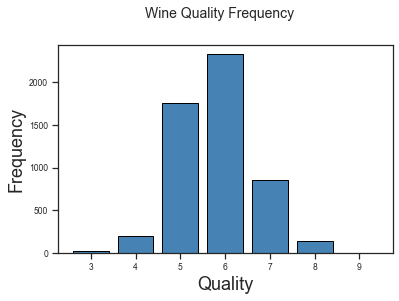

In [26]:
fig = plot.figure(figsize = (6, 4))
title = fig.suptitle("Wine Quality Frequency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Quality")
ax.set_ylabel("Frequency") 
w_q = wines_df['quality'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
        edgecolor='black', linewidth=1)

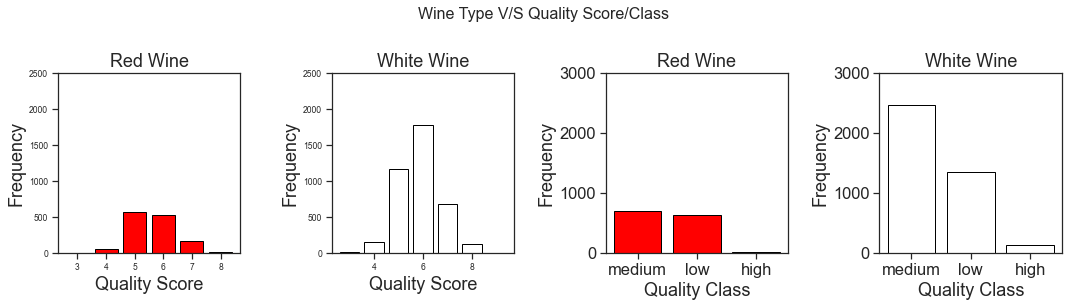

In [27]:
# We will see below the distributions of the data in the qualities by their types, and confirming the imbalance between classes(quality_label).

main_fig = plot.figure(figsize = (18,4))
title = main_fig.suptitle("Wine Type V/S Quality Score/Class", fontsize = 16)
main_fig.subplots_adjust(top = 0.75, wspace = 0.5)

# Red Wine : Quality and its frequency
graph_1 = main_fig.add_subplot(141)
graph_1.set_title("Red Wine")
graph_1.set_xlabel("Quality Score")
graph_1.set_ylabel("Frequency") 
redwine_quality = wines_df.quality[wines_df.wine_type == 'red'].value_counts()
redwine_quality = (list(redwine_quality.index), list(redwine_quality.values))
graph_1.set_ylim([0, 2500])
graph_1.tick_params(axis='both', which='major', labelsize=8.5)
bar_graph_1 = graph_1.bar(redwine_quality[0], redwine_quality[1], color='red', edgecolor='black', linewidth=1)


# White Wine : Quality and its frequency
graph_2 = main_fig.add_subplot(142)
graph_2.set_title("White Wine")
graph_2.set_xlabel("Quality Score")
graph_2.set_ylabel("Frequency") 
whitewine_quality = wines_df.quality[wines_df.wine_type == 'white'].value_counts()
whitewine_quality = (list(whitewine_quality.index), list(whitewine_quality.values))
graph_2.set_ylim([0, 2500])
graph_2.tick_params(axis = 'both', which = 'major', labelsize = 8.5)
bar_graph_2 = graph_2.bar(whitewine_quality[0], whitewine_quality[1], color='white',edgecolor='black', linewidth=1)


# Red Wine : Quality Label and its frequency
graph_3 = main_fig.add_subplot(143)
graph_3.set_title("Red Wine")
graph_3.set_xlabel("Quality Class")
graph_3.set_ylabel("Frequency") 
redwine_quality_label = wines_df.quality_label[wines_df.wine_type == 'red'].value_counts()
redwine_quality_label = (list(redwine_quality_label.index), list(redwine_quality_label.values))
graph_3.set_ylim([0, 3000])
bar_graph_3 = graph_3.bar(list(range(len(redwine_quality_label[0]))), redwine_quality_label[1], color = 'red', edgecolor = 'black', linewidth=1, tick_label = redwine_quality_label[0])

# White Wine : Quality Label and its frequency
graph_4 = main_fig.add_subplot(144)
graph_4.set_title("White Wine")
graph_4.set_xlabel("Quality Class")
graph_4.set_ylabel("Frequency") 
whitewine_quality_label = wines_df.quality_label[wines_df.wine_type == 'white'].value_counts()
whitewine_quality_label = (list(whitewine_quality_label.index), list(whitewine_quality_label.values))
graph_4.set_ylim([0, 3000])
bar_graph_4 = graph_4.bar(list(range(len(whitewine_quality_label[0]))), whitewine_quality_label[1], color = 'white', edgecolor = 'black', linewidth=1, tick_label = whitewine_quality_label[0])

# **Descriptive Statistics**

# Correlation between the features of the dataset: 

We can check how each features are reated with others using corr() function.

The correlation value ranges between -1 to 1.When it is close to 1, it means that there is a strong positive correlation. When the coefficient is close to –1, it means that there is a strong negative correlation. Finally, coefficients close to zero mean that there is no linear correlation. We can observe the detail information using correlation matrix


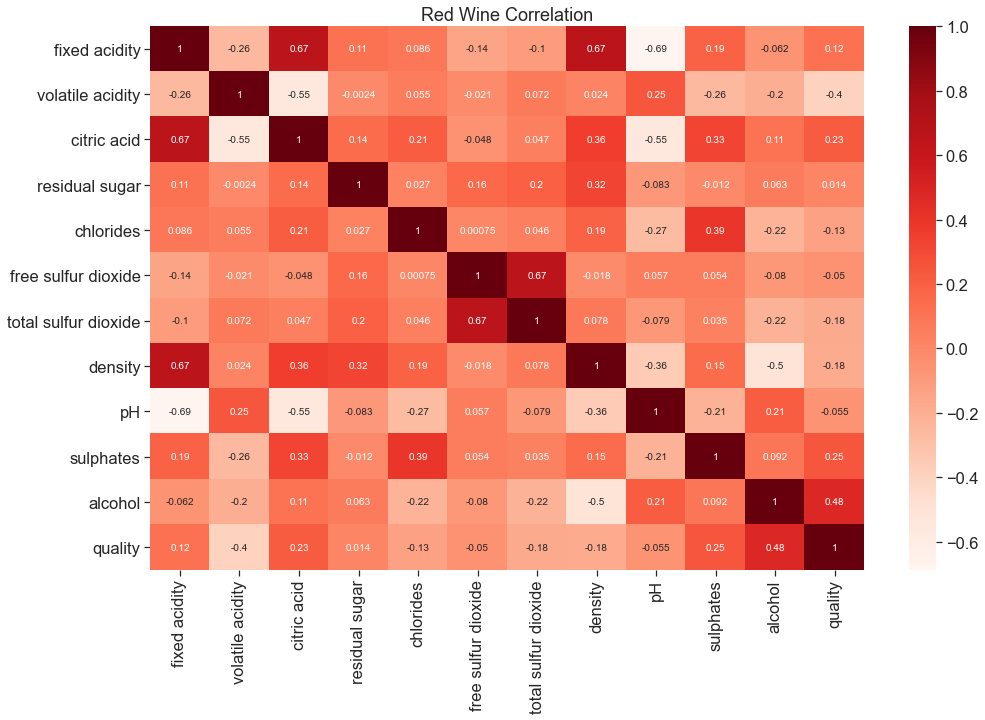

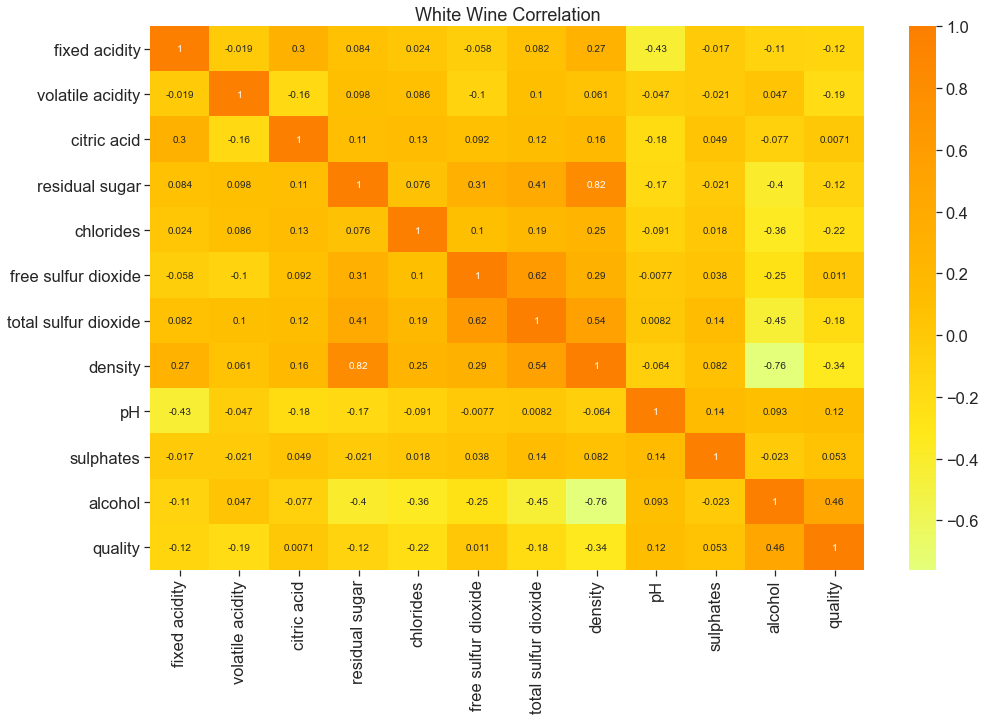

In [29]:
def correlation_between_attributes(w_type, colour,title):
    plot.figure(figsize=(16,10))
    sns.heatmap(wines_df[wines_df['wine_type']==w_type].corr(),cmap=colour, annot=True);
    plot.title(title, loc='center')
correlation_between_attributes('red','Reds','Red Wine Correlation')
correlation_between_attributes('white','Wistia','White Wine Correlation')

In [30]:
def relationship_based_on_corr(w_type, x_value, y_value, title):
    pp=sns.scatterplot(data=wines_df[wines_df['wine_type']==w_type], x=x_value, y=y_value, label=w_type)
    pp.legend()
    plot.title(title)

Negative relationship based on correlation: 



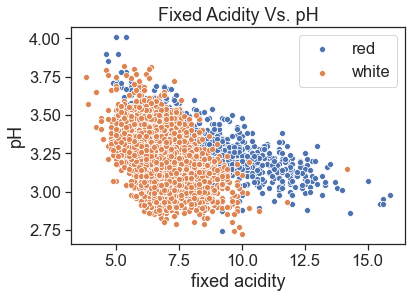

In [31]:
print("Negative relationship based on correlation: \n")
relationship_based_on_corr('red', 'fixed acidity', 'pH', "Fixed Acidity Vs. pH")
relationship_based_on_corr('white', 'fixed acidity', 'pH', "Fixed Acidity Vs. pH")

Positive relationship based on correlation: 



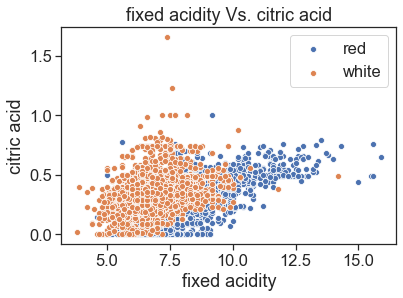

In [32]:
print("Positive relationship based on correlation: \n")
relationship_based_on_corr('red', 'fixed acidity', 'citric acid', "fixed acidity Vs. citric acid")
relationship_based_on_corr('white', 'fixed acidity', 'citric acid', "fixed acidity Vs. citric acid")

From the below code we can see that how different attributes are correlated with the target attribute 'Quality', alcohol being the most correlated column to pH being the least correlated

In [33]:
corrr = wines_df.corr()
top_corr_cols = corrr.quality.abs().sort_values(ascending=False).keys()
top_corr_cols

Index(['quality', 'alcohol', 'density', 'volatile acidity', 'chlorides',
       'citric acid', 'fixed acidity', 'residual sugar', 'free sulfur dioxide',
       'total sulfur dioxide', 'sulphates', 'pH'],
      dtype='object')

for checking outliers, whiskers and median after that we may remove outliers if we need..


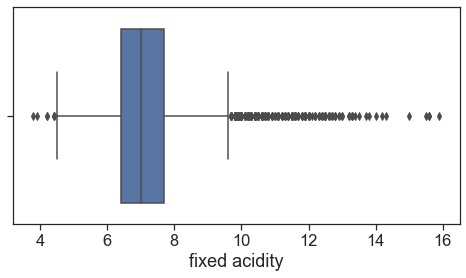

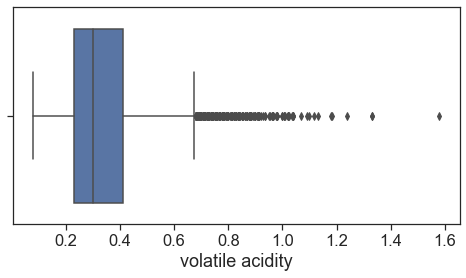

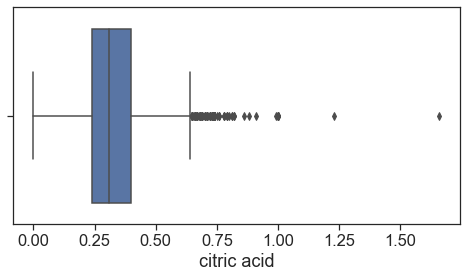

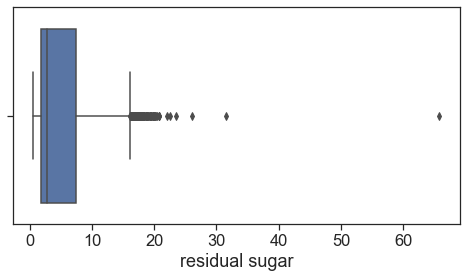

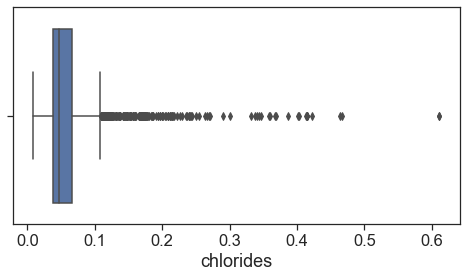

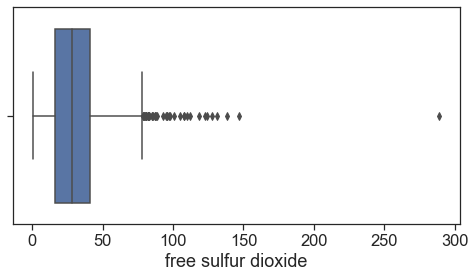

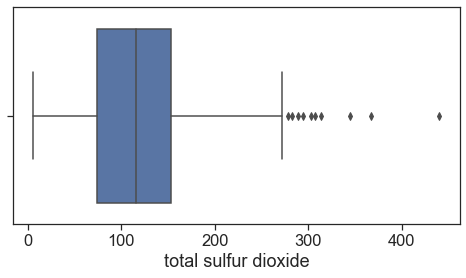

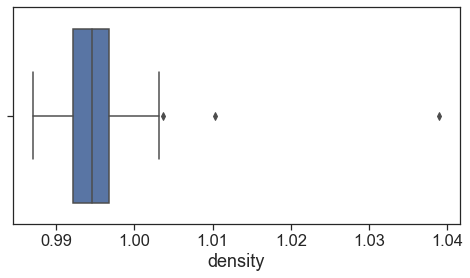

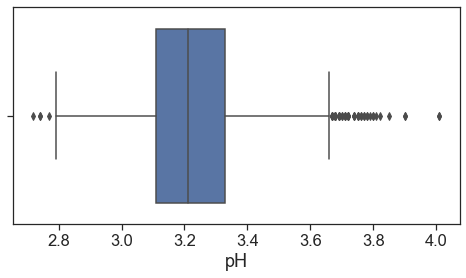

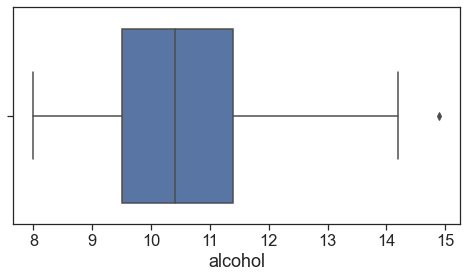

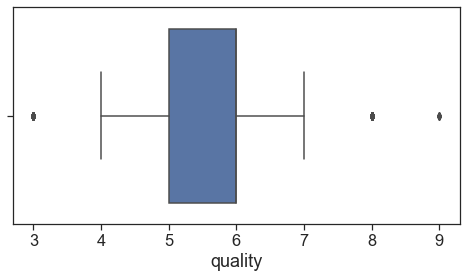

In [34]:
for i in wines_df.drop(['wine_type','quality_label'], axis=1).columns: 
    plot.figure(figsize=(8,4))              
    sns.boxplot(wines_df.drop(['wine_type','quality_label'], axis=1)[i])
    plot.show()

# Removing Outliers

In [38]:
wines_df = wines_df.drop(wines_df.index[wines_df['free sulfur dioxide'] > 120], axis=0)
#sns.boxplot(x=wines_df['free sulfur dioxide'], data=wines_df);

In [39]:
wines_df = wines_df.drop(wines_df.index[wines_df['density'] > 1.01], axis=0)
#sns.boxplot(x=wines_df['density'], data=wines_df);

In [40]:
wines_df = wines_df.drop(wines_df.index[wines_df['sulphates'] > 1.25], axis=0)
#sns.boxplot(x=wines_df['sulphates'], data=wines_df);

In [41]:
wines_df = wines_df.drop(wines_df.index[wines_df['volatile acidity'] > 1.10], axis=0)
wines_df = wines_df.drop(wines_df.index[wines_df['fixed acidity'] > 14], axis=0)
wines_df = wines_df.drop(wines_df.index[wines_df['citric acid'] > 0.85], axis=0)
wines_df = wines_df.drop(wines_df.index[wines_df['residual sugar'] > 21.00], axis=0)
wines_df = wines_df.drop(wines_df.index[wines_df['chlorides'] > 0.29], axis=0)
wines_df = wines_df.drop(wines_df.index[wines_df['alcohol'] > 14.50], axis=0)

## After removing outliers, the box plot looks like below,

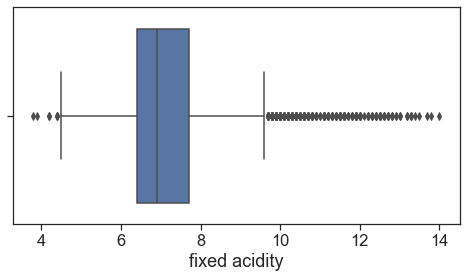

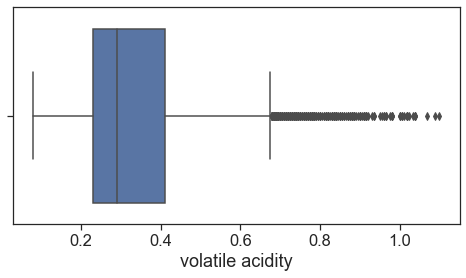

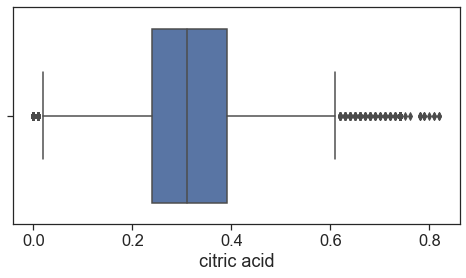

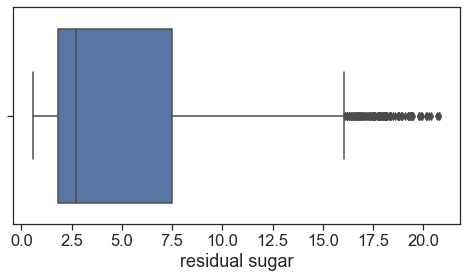

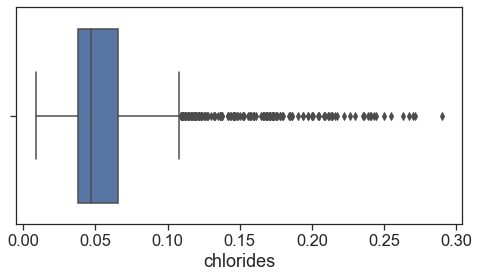

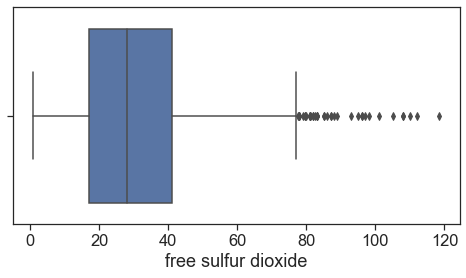

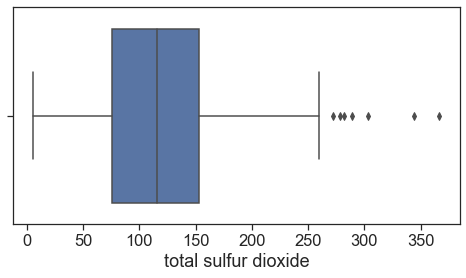

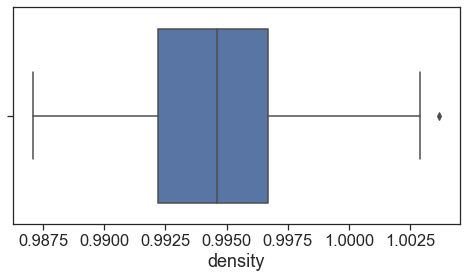

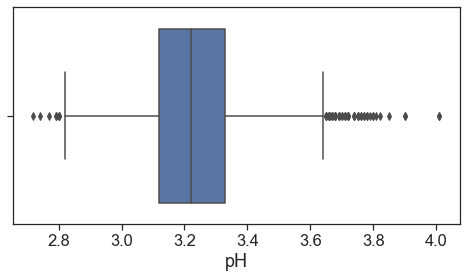

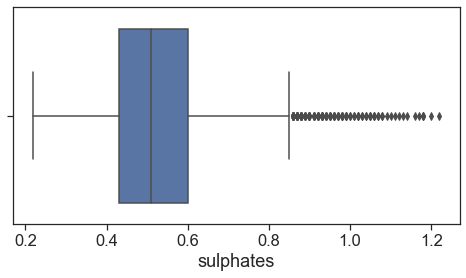

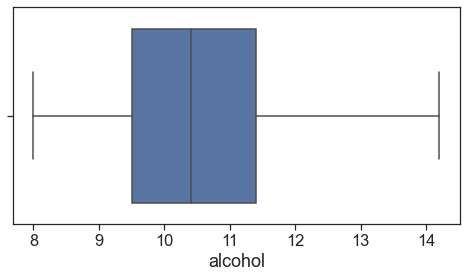

In [42]:
for i in wines_df.drop(['wine_type','quality_label','quality'], axis=1).columns: 
    plot.figure(figsize=(8,4))              
    sns.boxplot(wines_df.drop(['wine_type','quality_label','quality'], axis=1)[i])
    plot.show()

In [44]:
# By type of wine:

# get the columns
wines_attributes = wines_df.columns

# describe to get the statistical details like percentile, mean, standard deviation etc
redwine_describe = round(wines_df.loc[wines_df.wine_type == 'red', wines_attributes].describe(),2)
whitewine_describe = round(wines_df.loc[wines_df.wine_type == 'white', wines_attributes].describe(),2)

# concate the result of the describe
pd.concat([redwine_describe, whitewine_describe], axis=0, keys=['Red Wine Statistics', 'White Wine Statistics'])


fixed acidity  volatile acidity  citric acid  \
Red Wine Statistics   count        1317.00           1317.00      1317.00   
                      mean            8.28              0.53         0.27   
                      std             1.69              0.17         0.19   
                      min             4.60              0.12         0.00   
                      25%             7.10              0.39         0.09   
                      50%             7.90              0.52         0.25   
                      75%             9.20              0.64         0.42   
                      max            14.00              1.09         0.79   
White Wine Statistics count        3934.00           3934.00      3934.00   
                      mean            6.83              0.28         0.33   
                      std             0.86              0.10         0.12   
                      min             3.80              0.08         0.00   
                      25%             6.30              0.21         0.27   
                      50%             6.80              0.26         0.32   
                      75%             7.30              0.32         0.39   
                      max            11.80              1.10         0.82   

                             residual sugar  chlorides  free sulfur dioxide  \
Red Wine Statistics   count         1317.00    1317.00              1317.00   
                      mean             2.53       0.08                15.95   
                      std              1.36       0.03                10.51   
                      min              0.90       0.01                 1.00   
                      25%              1.90       0.07                 7.00   
                      50%              2.20       0.08                14.00   
                      75%              2.60       0.09                22.00   
                      max             15.50       0.27                72.00   
White Wine Statistics count         3934.00    3934.00              3934.00   
                      mean             5.87       0.05                34.65   
                      std              4.70       0.02                16.31   
                      min              0.60       0.01                 2.00   
                      25%              1.60       0.04                23.00   
                      50%              4.70       0.04                33.00   
                      75%              8.80       0.05                45.00   
                      max             20.80       0.29               118.50   

                             total sulfur dioxide  density       pH  \
Red Wine Statistics   count               1317.00  1317.00  1317.00   
                      mean                  46.72     1.00     3.32   
                      std                   33.32     0.00     0.15   
                      min                    6.00     0.99     2.88   
                      25%                   22.00     1.00     3.22   
                      50%                   38.00     1.00     3.31   
                      75%                   63.00     1.00     3.40   
                      max                  289.00     1.00     4.01   
White Wine Statistics count               3934.00  3934.00  3934.00   
                      mean                 136.80     0.99     3.20   
                      std                   42.53     0.00     0.15   
                      min                    9.00     0.99     2.72   
                      25%                  106.00     0.99     3.09   
                      50%                  132.00     0.99     3.18   
                      75%                  166.00     1.00     3.29   
                      max                  366.50     1.00     3.82   

                             sulphates  alcohol  quality  
Red Wine Statistics   count    1317.00  1317.00  1317.00  
                      mean        0.65    10.45  

**Following are the observation from the above descriptive statistic on the basis of type :** 

*   The  **mean** of **residual sugar** and **total sulfur dioxide** content   seems much higher in **white wine** then the **red wine** .
*   white wines has half concentration of **chlorides** then the red wines .
*   We observe that **citric acid** content is present more in white wines as compared to red wines.
*   For the **pH** content , although it seems a small difference but it is more in red wines.
*   The **mean** value of  **sulphate, fixed acidity and volatile acidity** is higher in red wines as compared to the white wines.






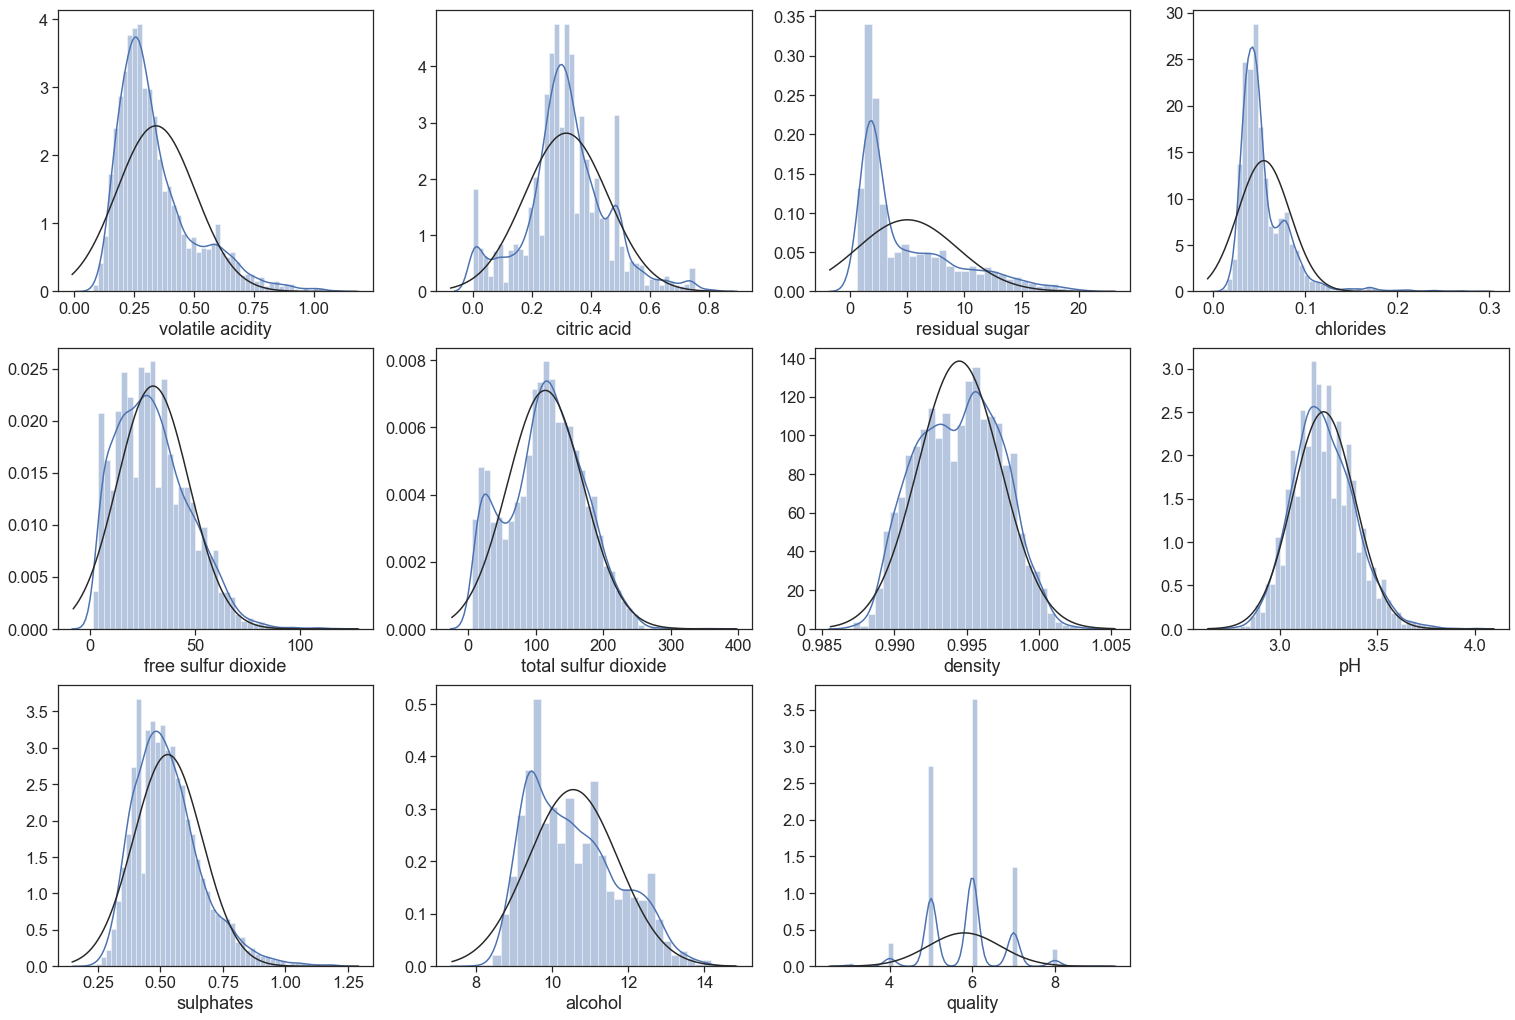

In [45]:
plot.figure(figsize = (26,30))

for i in range(1,12):
    plot.subplot(5,4,i)
    sns.distplot(wines_df[wines_df.columns[i]], fit=norm)
    

In [46]:
# By quality_label of wine:

low_quality_describe = round(wines_df[wines_df['quality_label'] == 'low'][wines_attributes].describe(),2)
medium_quality_describe = round(wines_df[wines_df['quality_label'] == 'medium'][wines_attributes].describe(),2)
high_quality_describe = round(wines_df[wines_df['quality_label'] == 'high'][wines_attributes].describe(),2)
pd.concat([low_quality_describe, medium_quality_describe, high_quality_describe], axis=0, keys=['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine'])

fixed acidity  volatile acidity  citric acid  \
Low Quality Wine    count        1945.00           1945.00      1945.00   
                    mean            7.31              0.40         0.30   
                    std             1.25              0.19         0.16   
                    min             4.20              0.10         0.00   
                    25%             6.50              0.26         0.20   
                    50%             7.10              0.34         0.29   
                    75%             7.80              0.52         0.40   
                    max            13.50              1.10         0.82   
Medium Quality Wine count        3153.00           3153.00      3153.00   
                    mean            7.14              0.31         0.32   
                    std             1.31              0.14         0.13   
                    min             3.80              0.08         0.00   
                    25%             6.30              0.21         0.26   
                    50%             6.90              0.27         0.32   
                    75%             7.60              0.36         0.39   
                    max            14.00              1.04         0.82   
High Quality Wine   count         153.00            153.00       153.00   
                    mean            6.84              0.30         0.34   
                    std             1.19              0.12         0.11   
                    min             3.90              0.12         0.03   
                    25%             6.20              0.22         0.29   
                    50%             6.80              0.28         0.33   
                    75%             7.30              0.36         0.38   
                    max            12.60              0.85         0.74   

                           residual sugar  chlorides  free sulfur dioxide  \
Low Quality Wine    count         1945.00    1945.00              1945.00   
                    mean             5.33       0.06                28.64   
                    std              4.69       0.03                18.21   
                    min              0.60       0.01                 2.00   
                    25%              1.80       0.04                13.00   
                    50%              2.70       0.05                25.00   
                    75%              8.00       0.08                41.00   
                    max             20.40       0.29               118.50   
Medium Quality Wine count         3153.00    3153.00              3153.00   
                    mean             4.86       0.05                30.62   
                    std              4.19       0.03                16.37   
                    min              0.70       0.01                 1.00   
                    25%              1.80       0.04                18.00   
                    50%              2.70       0.04                29.00   
                    75%              7.10       0.06                41.00   
                    max             20.80       0.26               112.00   
High Quality Wine   count          153.00     153.00               153.00   
                    mean             4.75       0.04                33.12   
                    std              3.62       0.02                16.42   
                    min              0.80       0.01                 3.00   
                    25%              1.90       0.03                24.00   
                    50%              3.80       0.04                32.00   
                    75%              6.80       0.04                41.00   
                    max             14.80       0.12               105.00   

                           total sulfur dioxide  density       pH  sulphates  \
Low Quality Wine    count               1945.00  1945.00  1945.00    1945.00   
                    mean                 117.89     1.00     3.22


**Following are the observation from the above descriptive statistic on the basis of quality_label :**

*   The **standard deviation** of **volatile acid** and **chlorides** are smaller in **high** quality wines as compared to **low** and **medium** quality wines.
*   **alcohol** makes a lot of difference in quality, we have observed that the higher the quality  the higher the average alcohol concentration. Although  **lower** quality wines have the **lowest standard deviation for the alcohol** .
*   **Higher** quality wines has less **fixed acidity** , but the **standard deviation** is slightly higher in medium quality wines
*   In **higher** quality wines the **free sulphardioxide** content is higer, bu their **standard deviation** decreases with the increase in the quality. 





# **Inferential Statistics**

The idea is to use statistical methods and models to draw statistical inferences from a given hypotheses. 

Each hypothesis consists of a null hypothesis and an alternative hypothesis.

Based on statistical test results, if the result is statistically significant based on pre-set significance levels (e.g., if obtained p-value is less than 5% significance level), we reject the null hypothesis in favor of the alternative hypothesis. Otherwise, if the results is not statistically significant, we conclude that our null hypothesis was correct.


We are using one way ANOVA(Analysis of variance)  , it is a statistical model and used to analyze statistically significant differences among the means of various groups.

This is basically achieved using a statistical test that helps us determine whether or not the means of several groups are equal.

The alternative hypothesis, HA, tells us that there exists at least two group means that are statistically significantly different from each other.

the F-statistic and the associated p-value from it is used to determine the statistical significance. Typically a p-value less than 0.05 is taken to be a statistically significant result where we reject the null hypothesis in favor of the original

So let's evaluate the hypotheses of each of our previous highlights through the statistical inference test

In [47]:

def wine_type_inferential_stat_test(attribute):
    F, p = f_oneway(wines_df[wines_df.wine_type == 'red'][attribute], 
                    wines_df[wines_df.wine_type == 'white'][attribute])
    if p <= 0.05:
        msg = 'Reject'
    else:
        msg = 'Accept'
    print('F Statistic: {:.2f} \tp-value: {:.5f} \tNull Hypothesis: {}'.format(F, p, msg))
    
def wine_quality_inferential_stat_test(attribute):
    F, p = f_oneway(wines_df[wines_df.quality_label == 'low'][attribute], 
                    wines_df[wines_df.quality_label == 'medium'][attribute], 
                    wines_df[wines_df.quality_label == 'high'][attribute])
    if p <= 0.05:
        msg = 'Reject'
    else:
        msg = 'Accept'
    print('F Statistic: {:.2f} \tp-value: {:.5f} \tNull Hypothesis: {}'.format(F, p, msg))

In [48]:
print('ANOVA - Analysis Of Variance, test across wine samples with different types of wines:\n')

print("Mean residual sugar and total sulfur dioxide content in white wine seems to be much higher than red wine")
wine_type_inferential_stat_test('residual sugar')
wine_type_inferential_stat_test('total sulfur dioxide')
print(dash,"\n")

print("Mean value of sulphates, fixed acidity and volatile acidity seem to be higher in red wine as compared to white wine.\n")
wine_type_inferential_stat_test('sulphates')
wine_type_inferential_stat_test('fixed acidity')
wine_type_inferential_stat_test('volatile acidity')
print(dash,"\n")

print("citric acid is more present in white than red wines.\n")
wine_type_inferential_stat_test('citric acid')
print(dash,"\n")

print("white wines has half concentrations of chlorides then red wines.\n")
wine_type_inferential_stat_test('chlorides')
print(dash,"\n")

print("pH the difference seems small but it is slightly larger in red wines.\n")
wine_type_inferential_stat_test('pH')

ANOVA - Analysis Of Variance, test across wine samples with different types of wines:

Mean residual sugar and total sulfur dioxide content in white wine seems to be much higher than red wine
F Statistic: 644.56 	p-value: 0.00000 	Null Hypothesis: Reject
F Statistic: 4900.21 	p-value: 0.00000 	Null Hypothesis: Reject
------------------------------------------------------------------------------------------------------------------------------------------------------ 

Mean value of sulphates, fixed acidity and volatile acidity seem to be higher in red wine as compared to white wine.

F Statistic: 1654.13 	p-value: 0.00000 	Null Hypothesis: Reject
F Statistic: 1622.83 	p-value: 0.00000 	Null Hypothesis: Reject
F Statistic: 3838.63 	p-value: 0.00000 	Null Hypothesis: Reject
------------------------------------------------------------------------------------------------------------------------------------------------------ 

citric acid is more present in white than red wines.

F Statistic

In [49]:
print('ANOVA - Analysis Of Variance, test across wine samples with different levels of quality:\n')

print("alcohol makes a lot of difference in quality. Although lower quality wines have the lowest standard deviation.\n")
wine_quality_inferential_stat_test('alcohol')
print(dash,"\n")

print("The standard deviation of volatile acid and chlorides are smaller in high quality wines as comapared to low and medium quality wines.\n")
wine_quality_inferential_stat_test('chlorides')
wine_quality_inferential_stat_test('volatile acidity')
print(dash,"\n")

print("The free sulfur dioxide is higher with higher quality, but their standard deviation decrease with the increase in the quality.\n")
wine_quality_inferential_stat_test('free sulfur dioxide')
print(dash,"\n")

print("Higher quality has less fixed acidity, but the standard deviation is slightly higher in medium quality.\n")
wine_quality_inferential_stat_test('fixed acidity')

ANOVA - Analysis Of Variance, test across wine samples with different levels of quality:

alcohol makes a lot of difference in quality. Although lower quality wines have the lowest standard deviation.

F Statistic: 636.39 	p-value: 0.00000 	Null Hypothesis: Reject
------------------------------------------------------------------------------------------------------------------------------------------------------ 

The standard deviation of volatile acid and chlorides are smaller in high quality wines as comapared to low and medium quality wines.

F Statistic: 125.69 	p-value: 0.00000 	Null Hypothesis: Reject
F Statistic: 200.86 	p-value: 0.00000 	Null Hypothesis: Reject
------------------------------------------------------------------------------------------------------------------------------------------------------ 

The free sulfur dioxide is higher with higher quality, but their standard deviation decrease with the increase in the quality.

F Statistic: 10.74 	p-value: 0.00002 	Nu

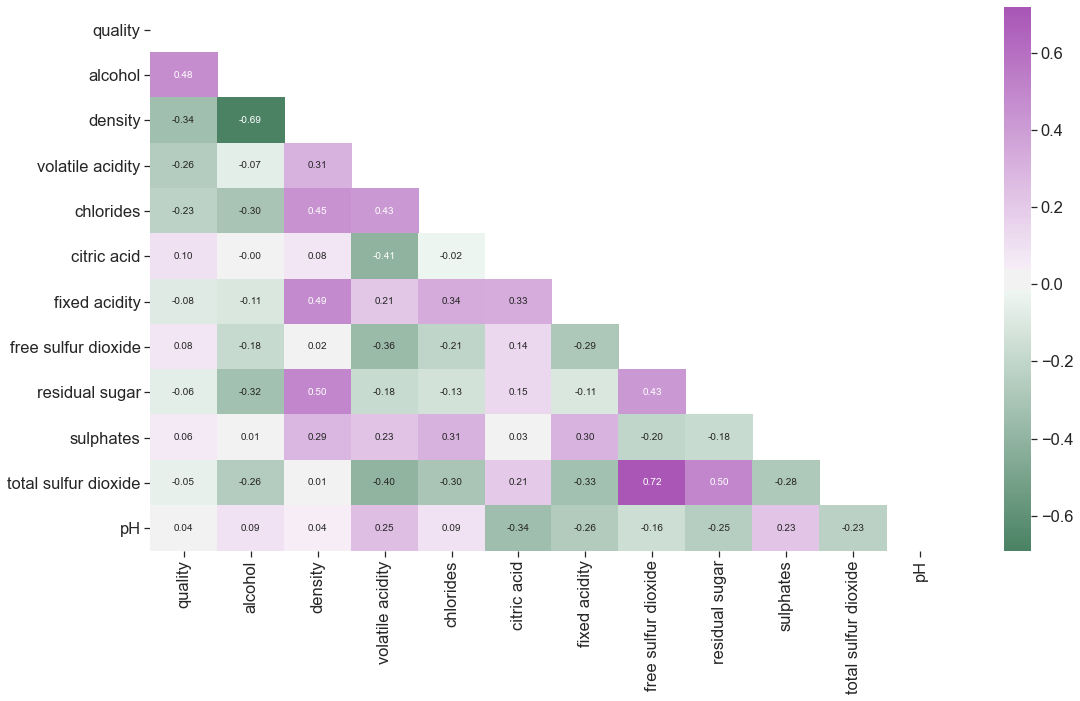

In [52]:
def correlation_based_on_quality():
    corrr = wines_df.corr()
    top_corr_cols = corrr.quality.abs().sort_values(ascending=False).keys()
   
    top_corr = corrr.loc[top_corr_cols, top_corr_cols]
    
    dropSelf = np.zeros_like(top_corr)
    dropSelf[np.triu_indices_from(dropSelf)] = True

    plot.figure(figsize=(18, 10))

    sns.heatmap(top_corr, cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)
    sns.set(font_scale=1.5)
    
    plot.savefig('correlation_based_on_quality.png',transparent=True, bbox_inches='tight', pad_inches=0.3)
    plot.show()
  
  
correlation_based_on_quality()

### Wine quality has the highest correlation with alcohol. Other relation degrees are very low with each other,such as citric acid,free_sulfur_dioxide, sulphates and pH. Quality also has a low negative correlation with density,volatile acidity, chlorides, total_sulfur_dioxide and residual_sugar.

In [53]:
def pairplot_of_wines_by_quality():
    cols = wines_df.columns
    cols = cols.drop('quality')
    pairplot_based_on_quality = sns.pairplot(data = wines_df.loc[:, cols], hue='quality_label')
    fig = pairplot_based_on_quality.fig 
    fig.subplots_adjust(top=0.93, wspace=0.3)
    title = fig.suptitle('Pairplot of Wine Attributes by Quality Label', fontsize=24)
    plot.savefig('pairplot_graph.png',transparent=True, bbox_inches='tight', pad_inches=0.3)
    plot.show()

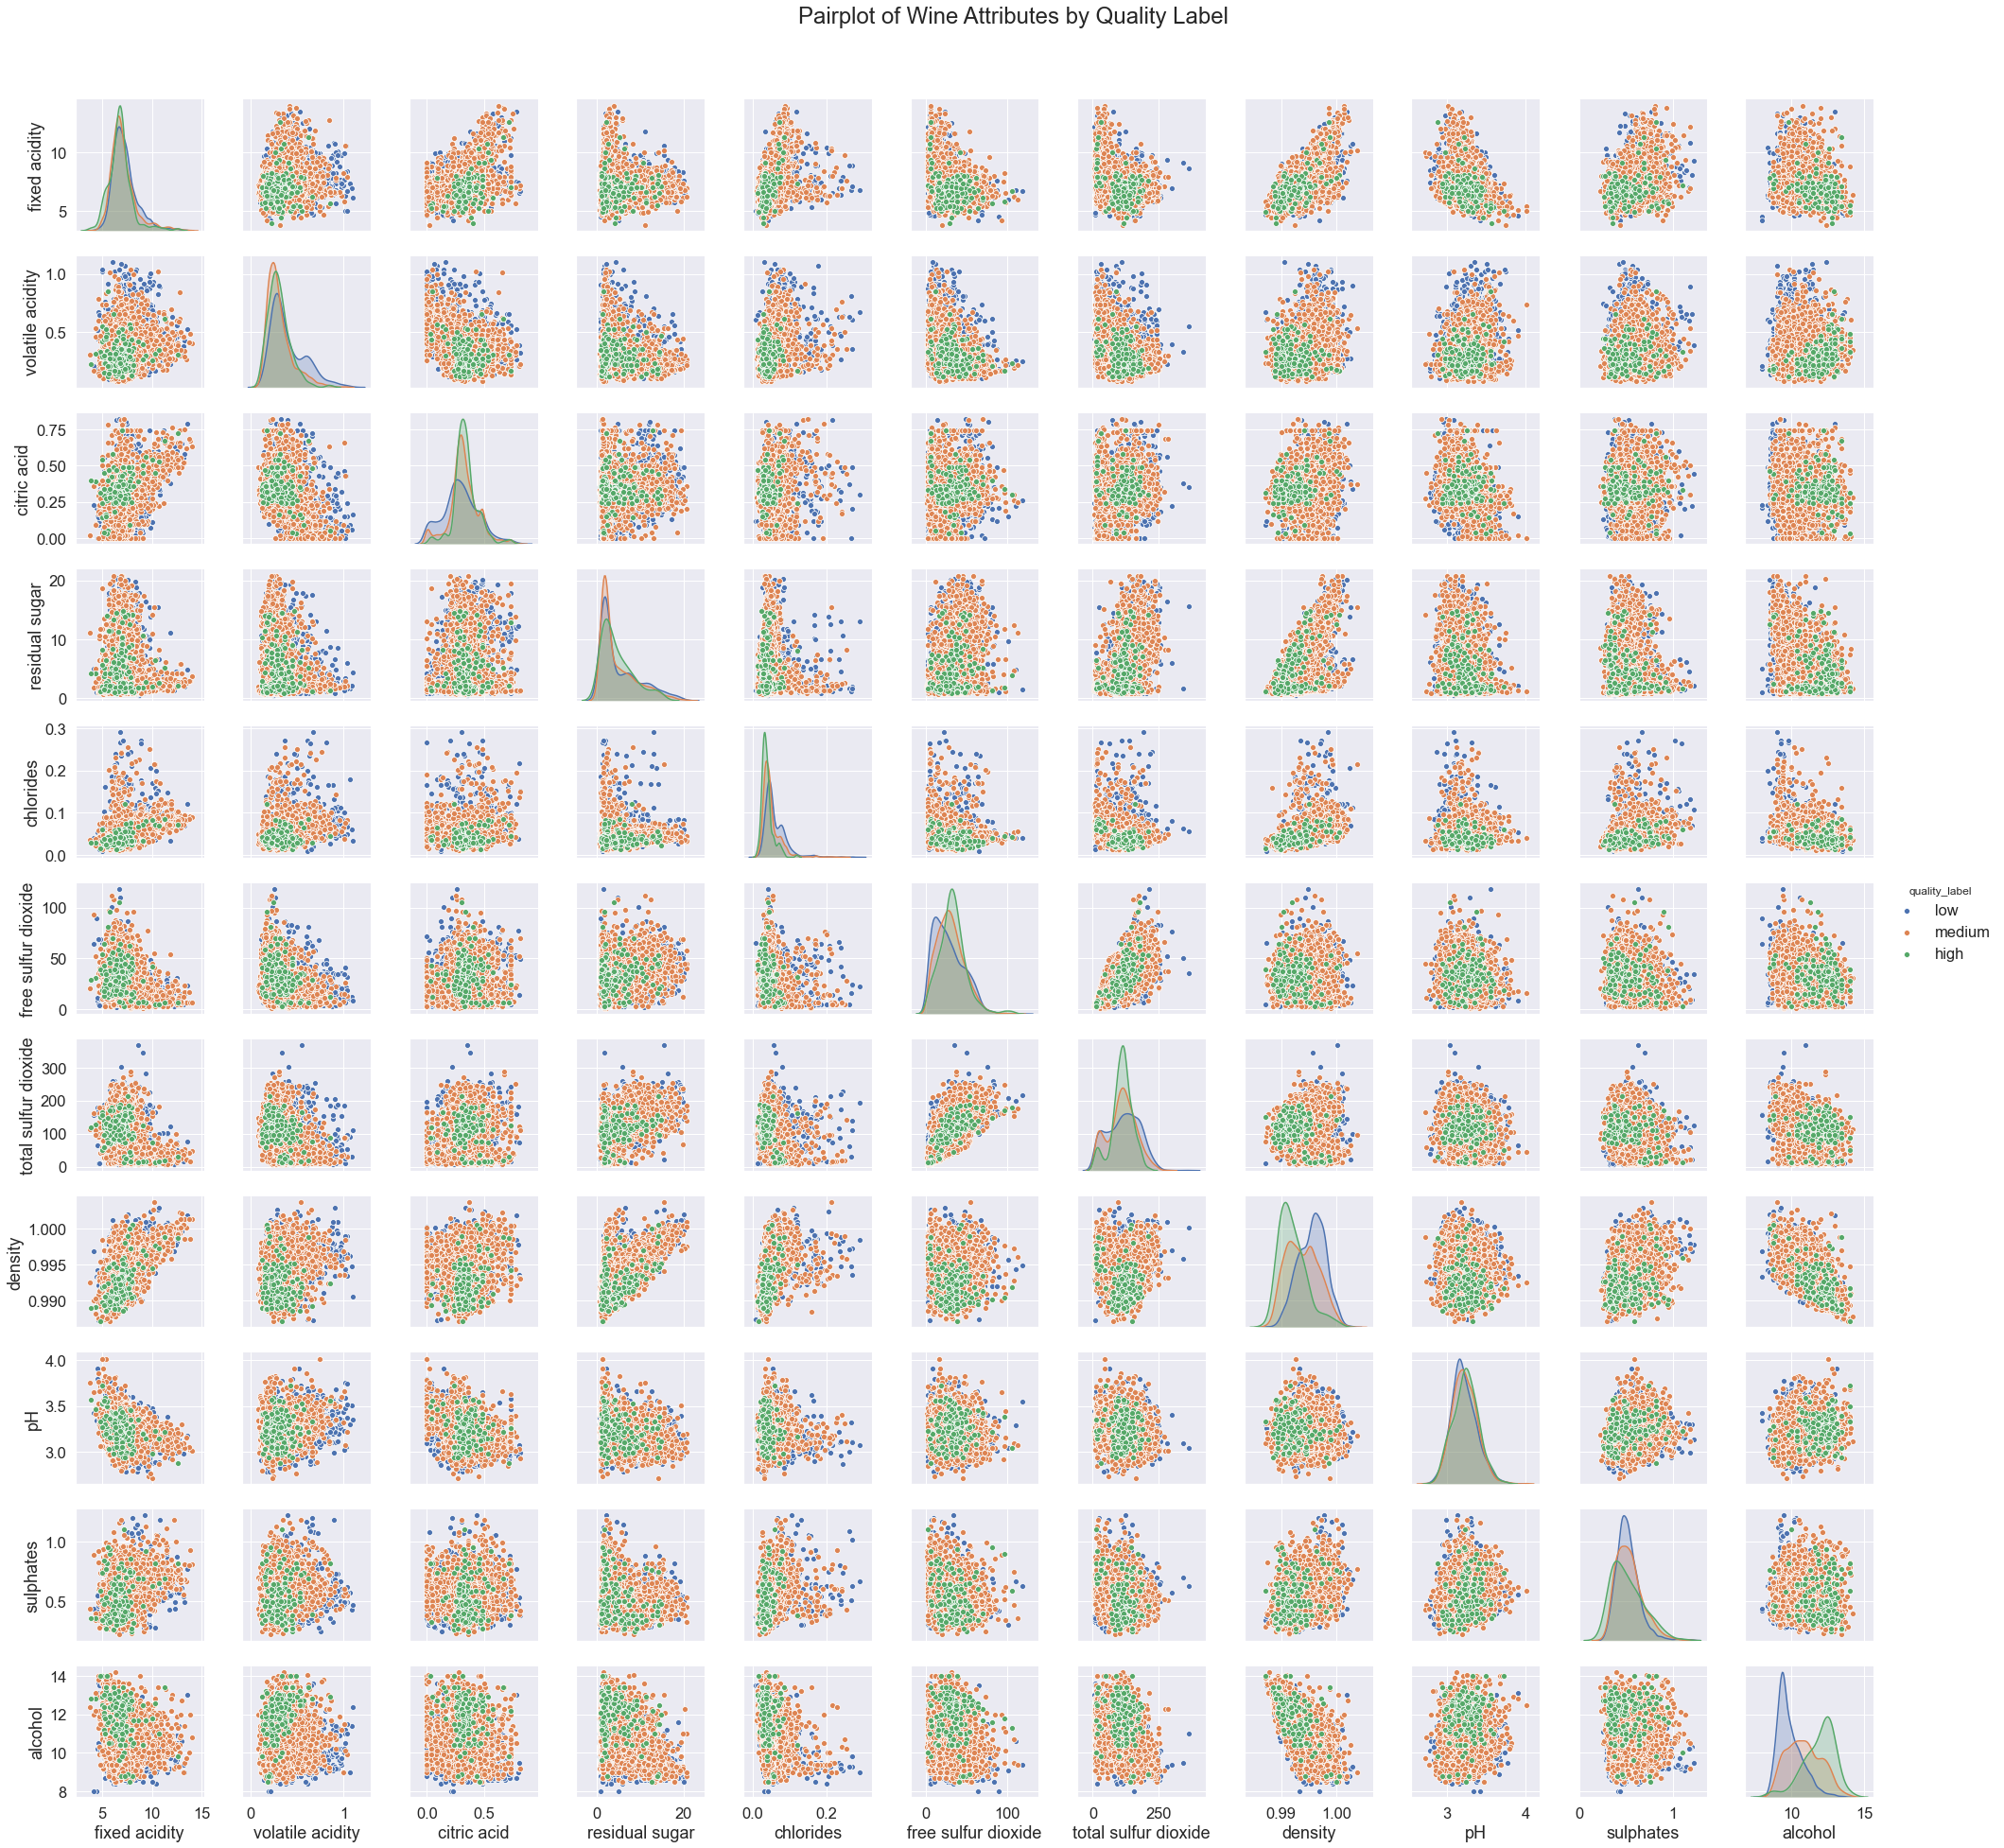

In [54]:
# this function will take few seconds, as it is displaying the pairplot for each attributes of wines
pairplot_of_wines_by_quality()

## With the insights we obtained earlier at ANOVA test and correlations

Lower sulphate levels in wines with high quality ratings, but the highest are found in the medium quality.

Lower levels of volatile acids in wines with high quality ratings
    
The highest correlation, 0.72, is see between total and free sulfur dioxide, which is expected, but the two measures have low correlation and in opposite directions with the quality. 

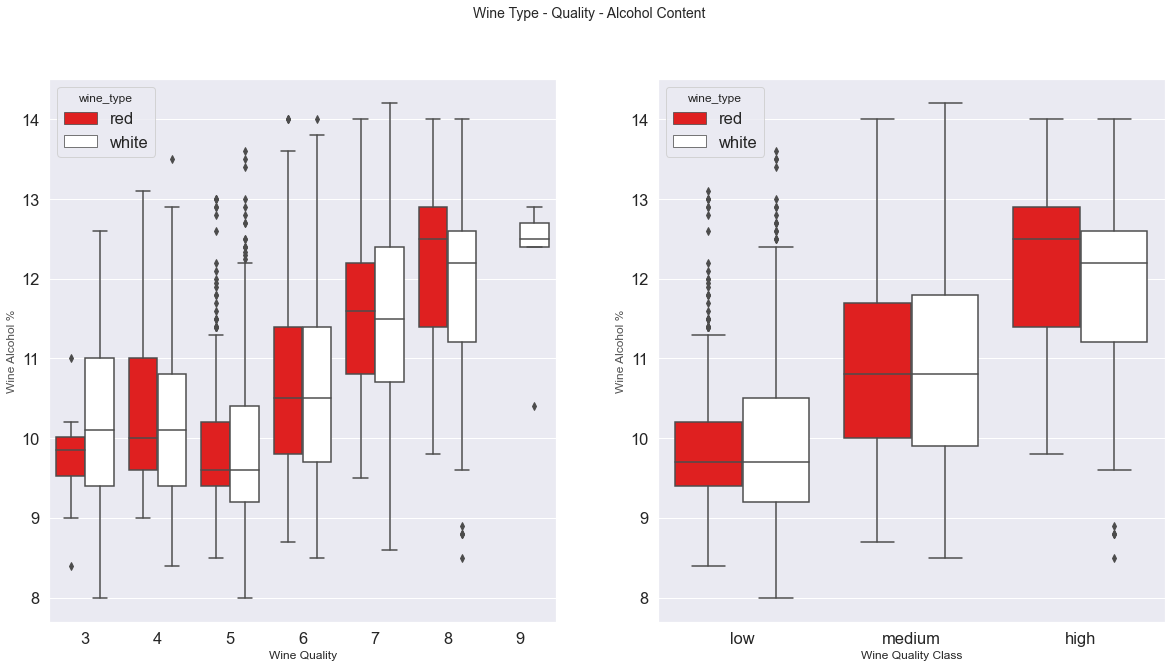

In [55]:
def relation_of_wine_quality_and_their_alcohol():
    fig_wrapper, (axis_1, axis_2) = plot.subplots(1, 2, figsize = (20, 10))
    fig_wrapper.suptitle('Wine Type - Quality - Alcohol Content', fontsize=14)

    sns.boxplot(x='quality', y='alcohol', hue='wine_type', data=wines_df, palette={"red": "#FF0000", "white": "white"}, ax = axis_1)
    axis_1.set_xlabel("Wine Quality", size = 12)
    axis_1.set_ylabel("Wine Alcohol %", size = 12, alpha = 0.8)

    sns.boxplot(x = 'quality_label', y = 'alcohol', hue = 'wine_type', data = wines_df, palette = {"red": "#FF0000", "white": "white"}, ax = axis_2)
    axis_2.set_xlabel("Wine Quality Class", size = 12)
    axis_2.set_ylabel("Wine Alcohol %", size = 12, alpha = 0.8)

    plot.savefig('relation_of_wine_quality_and_their_alcohol.png',transparent=True, bbox_inches='tight', pad_inches=0.3)
    plot.show()
    
relation_of_wine_quality_and_their_alcohol()

### We can see that: 
#### Each box plot above depicts the distribution of alcohol level for a particular wine quality rating separated by wine types. 
#### We can also clearly observe that the wine alcohol distribution has an increasing trend based on higher quality wine samples, and some outliers in each quality level often depicted by individual points

# Linear Regression

In [56]:
# Selecting the input and output features for regression tasks
X = wines_df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
            'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y = wines_df['quality']


# splitting the dataset to train and test
# The ideal split would be 80-20 or 70-30 as training and testing set respectively. Also the random_state is included if you wish to work on the same values everytime.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)


In [57]:
# fit the model on train set
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [58]:
print("the result for regression.coef_ should look something like this: \n")
regression.coef_

the result for regression.coef_ should look something like this: 



array([ 7.73970435e-02, -1.20778404e+00, -1.01747472e-01,  3.26407166e-02,
       -8.60247665e-02,  1.01816181e-02, -2.70208524e-03, -5.64453745e+01,
        4.82739793e-01,  8.41399153e-01,  2.74802543e-01])

In [59]:
coeff = pd.DataFrame(data = regression.coef_, index = X.columns[:11], columns=['coefficient'])
print("The coef_ contain the coefficients for the prediction of each of the targets.\n")
coeff

The coef_ contain the coefficients for the prediction of each of the targets.



coefficient
fixed acidity            0.077397
volatile acidity        -1.207784
citric acid             -0.101747
residual sugar           0.032641
chlorides               -0.086025
free sulfur dioxide      0.010182
total sulfur dioxide    -0.002702
density                -56.445375
pH                       0.482740
sulphates                0.841399
alcohol                  0.274803

In [60]:
y_pred = regression.predict(X_test) #Run the model and predict on the test set

The output looks something like the below:



Text(0.5, 1.0, 'Actual vs Predictions')

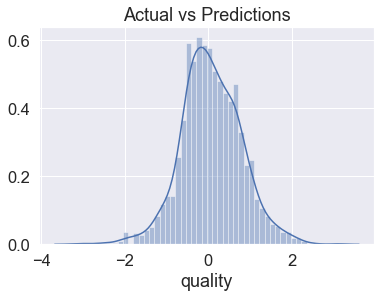

In [61]:
print("The output looks something like the below:\n")
sns.distplot((y_test - y_pred),bins=50)
plot.title('Actual vs Predictions')
# plot.savefig('Actual_vs_Predictions.png',transparent=True, bbox_inches='tight', pad_inches=0.3)

In [ ]:
# plot.hist((y_test-y_pred))

#### The assumption of error terms being normally distributed holds good!

In [62]:
dataframe_for_pred = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred}) 
dataframe_for_pred['Prediction']  = round(dataframe_for_pred['Prediction'],3)

#View first few predictions against actual values
dataframe_for_pred.head()

Actual  Prediction
1988       6       5.633
4823       6       5.519
1609       5       5.308
3686       6       5.598
791        7       6.702

### Although the model is not very precise, the predicted percentages are close to the actual ones.

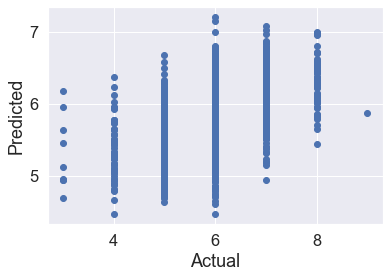

In [63]:
#Plot the predictions vs actual values
fig, axis = plot.subplots()
axis.scatter(y_test,y_pred)
axis.set_xlabel('Actual')
axis.set_ylabel('Predicted')
plot.savefig('predictions_vs_actual_values.png',transparent=True, bbox_inches='tight', pad_inches=0.3)
plot.show()

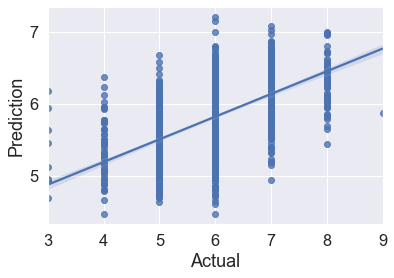

In [64]:

sns.regplot('Actual','Prediction', data=dataframe_for_pred)
plot.savefig('regplot_predictions_vs_actual_values.png',transparent=True, bbox_inches='tight', pad_inches=0.3)

## Evaluating Model Performance:
   ### Mean Absolute Error (MAE) is the mean of the absolute value of the errors.

   ### Mean Squared Error (MSE) is the mean of the squared errors.

   ### Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.

In [65]:
# Print the Mean Absolute Error, Mean Squared Error and Root Mean Squared Errors of the Regression Model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\nWe want the value of RMSE to be as low as possible, as lower the RMSE value is, the better the model is with its predictions\n')

Mean Absolute Error: 0.5627950291478633
Mean Squared Error: 0.5280586656247985
Root Mean Squared Error: 0.7266764518166242

We want the value of RMSE to be as low as possible, as lower the RMSE value is, the better the model is with its predictions



In [ ]:
# train_accuracy = lr.score(X_train, y_train)
# test_accuracy = lr.score(X_test, y_test)
# print('One-vs-rest', '-'*35, 
#       'Accuracy in Train Group   : {:.2f}'.format(train_accuracy), 
#       'Accuracy in Test  Group   : {:.2f}'.format(test_accuracy), sep='\n')

# Linear Regression With Regularization

In [66]:

feat = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',\
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',\
       'pH', 'sulphates', 'alcohol']

In [67]:
#wines_df=wines_df.drop(['wine_type','quality_label'],axis=1)
X=wines_df[feat]
y=wines_df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
scaler = RobustScaler()

In [68]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print('Intercept: ',lm.intercept_)
print('\n')
#print('Coefficients: ',lm.coef_)
pd.DataFrame(data = lm.coef_, index = X.columns[:11], columns=['coefficients']).reset_index()

Intercept:  5.62391900403787




index  coefficients
0          fixed acidity      0.122767
1       volatile acidity     -0.191449
2            citric acid     -0.003122
3         residual sugar      0.254629
4              chlorides      0.000185
5    free sulfur dioxide      0.257391
6   total sulfur dioxide     -0.228752
7                density     -0.362929
8                     pH      0.132839
9              sulphates      0.153594
10               alcohol      0.488956

Text(0, 0.5, 'Predicted Values')

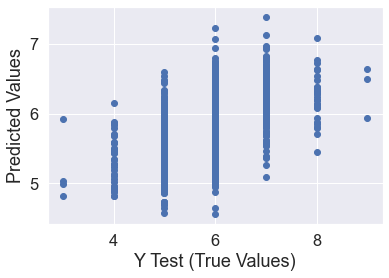

In [70]:
predictions = lm.predict(X_test)
plot.scatter(y_test,predictions)
plot.xlabel('Y Test (True Values)')
plot.ylabel('Predicted Values')

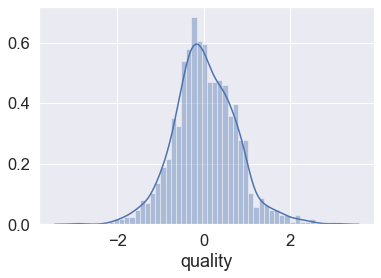

In [71]:
sns.distplot((y_test-predictions),bins=50);

In [72]:
print('MAE: ', metrics.mean_absolute_error(y_test,predictions))
print('MSE: ', metrics.mean_squared_error(y_test,predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  0.5572449847064274
MSE:  0.5188773779579283
RMSE:  0.7203314361860992


In [73]:
metrics.explained_variance_score(y_test, predictions)

0.30727925070560813

In [ ]:
# train_accuracy = lm.score(X_train, y_train)
# test_accuracy = lm.score(X_test, y_test)
# print('One-vs-rest', '-'*35, 
#       'Accuracy in Train Group   : {:.2f}'.format(train_accuracy), 
#       'Accuracy in Test  Group   : {:.2f}'.format(test_accuracy), sep='\n')

In [ ]:
# y_train_pred = lm.predict(X_train)
# newX = pd.DataFrame({"Constant":np.ones(len(X_train))}).join(pd.DataFrame(X_train))
# # newX = pd.DataFrame({"Constant":np.ones(len(X_train))}).join(pd.DataFrame(X_train.reset_index(drop=True)))
# MSE = (sum((y_train - y_train_pred)**2))/(len(newX)-len(newX.columns))
# params = np.append(lm.intercept_,lm.coef_)


# # Note if you don't want to use a DataFrame replace the two lines above with
# # newX = np.append(np.ones((len(X),1)), X, axis=1)
# # MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

# var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
# sd_b = np.sqrt(var_b)
# ts_b = params/ sd_b

# # print(ts_b)

# p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]


# sd_b = np.round(sd_b,3)
# ts_b = np.round(ts_b,3)
# p_values = np.round(p_values,3)
# params = np.round(params,4)

# myDF3 = pd.DataFrame()
# myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
# print(myDF3)

In [74]:
import statsmodels.api as sm
from scipy import stats


X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     178.1
Date:                Sat, 14 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:34:09   Log-Likelihood:                -4612.2
No. Observations:                4200   AIC:                             9248.
Df Residuals:                    4188   BIC:                             9324.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6239      0.027    210.708      0.0

In [75]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [76]:
wines_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
5315            6.2              0.21         0.29             1.6      0.039   
5316            6.6              0.32         0.36             8.0      0.047   
5317            6.5              0.24         0.19             1.2      0.041   
5318            5.5              0.29         0.30             1.1      0.022   
5319            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
5315                 24.0                  92.0  0.99114  3.27       0.50   
5316                 57.0                 168.0  0.99490  3.15       0.46   
5317                 30.0                 111.0  0.99254  2.99       0.46   
5318                 20.0                 110.0  0.98869  3.34       0.38   
5319                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality wine_type quality_label  
0         9.4        5       red           low  
1         9.8        5       red           low  
2         9.8        5       red           low  
3         9.8        6       red        medium  
4         9.4        5       red           low  
...       ...      ...       ...           ...  
5315     11.2        6     white        medium  
5316      9.6        5     white           low  
5317      9.4        6     white        medium  
5318     12.8        7     white        medium  
5319     11.8        6     white        medium  

[5251 rows x 14 columns]

In [ ]:
# neat = ['fixed acidity','volatile acidity','residual sugar','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
# XX=wines_df[neat]
# yy=wines_df['quality']
# XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.2, random_state=123)
# scaler = RobustScaler()
# XX_train = scaler.fit_transform(XX_train)
# XX_test = scaler.transform(XX_test)
# lm = LinearRegression()
# lm.fit(XX_train,yy_train)
# print('Intercept: ',lm.intercept_)
# print('\n')
# print('Coefficient: ',lm.coef_)
#pd.DataFrame(data = lm.coef_, index = XX.columns[:11], columns=['coefficients']).reset_index()

In [ ]:
# predictions = lm.predict(XX_test)
# plot.scatter(yy_test,predictions)
# plot.xlabel('Y Test (True Values)')
# plot.ylabel('Predicted Values')

In [ ]:
# sns.distplot((y_test-predictions),bins=50);

In [ ]:
# print('MAE: ', metrics.mean_absolute_error(yy_test,predictions))
# print('MSE: ', metrics.mean_squared_error(yy_test,predictions))
# print('RMSE: ', np.sqrt(metrics.mean_squared_error(yy_test,predictions)))

In [ ]:
# from sklearn.linear_model import Ridge
# reg = linear_model.Ridge(alpha=.5)
# rmsess=[]

# alphas = np.array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])
# for alpha in alphas:
#   ridgereg = Ridge(alpha=alpha,normalize=True)
#   ridgereg.fit(XX_train,yy_train)
#   yy_pred = ridgereg.predict(XX_train)
#   rmsess.append(np.sqrt(metrics.mean_squared_error(yy_train,yy_pred)))

# rmsess

In [77]:
rwines = wines_df
rwines['white_ind'] = (rwines['wine_type']=='white')*1
rwines

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
5315            6.2              0.21         0.29             1.6      0.039   
5316            6.6              0.32         0.36             8.0      0.047   
5317            6.5              0.24         0.19             1.2      0.041   
5318            5.5              0.29         0.30             1.1      0.022   
5319            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
5315                 24.0                  92.0  0.99114  3.27       0.50   
5316                 57.0                 168.0  0.99490  3.15       0.46   
5317                 30.0                 111.0  0.99254  2.99       0.46   
5318                 20.0                 110.0  0.98869  3.34       0.38   
5319                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality wine_type quality_label  white_ind  
0         9.4        5       red           low          0  
1         9.8        5       red           low          0  
2         9.8        5       red           low          0  
3         9.8        6       red        medium          0  
4         9.4        5       red           low          0  
...       ...      ...       ...           ...        ...  
5315     11.2        6     white        medium          1  
5316      9.6        5     white           low          1  
5317      9.4        6     white        medium          1  
5318     12.8        7     white        medium          1  
5319     11.8        6     white        medium          1  

[5251 rows x 15 columns]

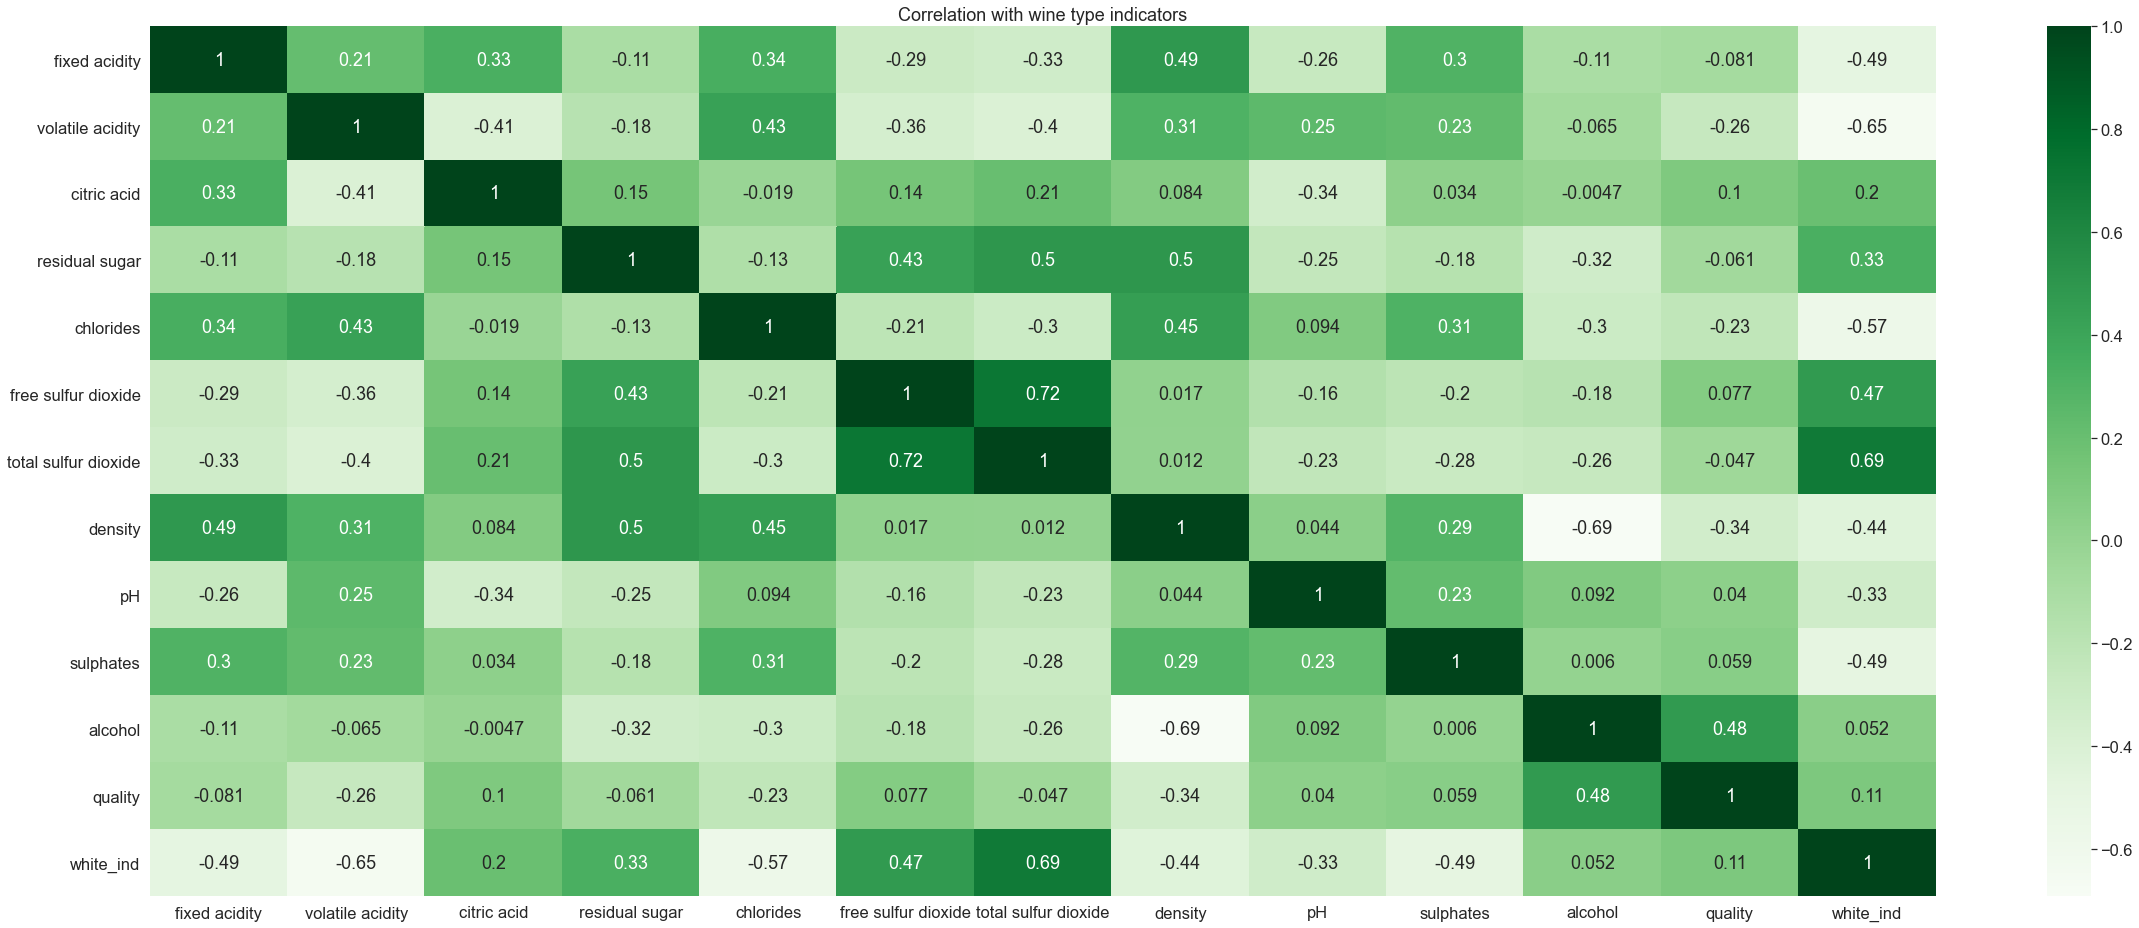

In [78]:
def correlation_between_attributes():
    plot.figure(figsize=(40,16))
    sns.heatmap(rwines.corr(),cmap='Greens', annot=True);
    plot.title('Correlation with wine type indicators', loc='center')
correlation_between_attributes()

In [79]:
pwines=rwines
feat_n = [x+" x white_ind" for x in feat]
pwines[feat_n] = pwines[feat].multiply(pwines['white_ind'], axis=0)
pwines

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
5315            6.2              0.21         0.29             1.6      0.039   
5316            6.6              0.32         0.36             8.0      0.047   
5317            6.5              0.24         0.19             1.2      0.041   
5318            5.5              0.29         0.30             1.1      0.022   
5319            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
5315                 24.0                  92.0  0.99114  3.27       0.50   
5316                 57.0                 168.0  0.99490  3.15       0.46   
5317                 30.0                 111.0  0.99254  2.99       0.46   
5318                 20.0                 110.0  0.98869  3.34       0.38   
5319                 22.0                  98.0  0.98941  3.26       0.32   

      ...  volatile acidity x white_ind  citric acid x white_ind  \
0     ...                          0.00                     0.00   
1     ...                          0.00                     0.00   
2     ...                          0.00                     0.00   
3     ...                          0.00                     0.00   
4     ...                          0.00                     0.00   
...   ...                           ...                      ...   
5315  ...                          0.21                     0.29   
5316  ...                          0.32                     0.36   
5317  ...                          0.24                     0.19   
5318  ...                          0.29                     0.30   
5319  ...                          0.21                     0.38   

     residual sugar x white_ind chlorides x white_ind  \
0                           0.0                 0.000   
1                           0.0                 0.000   
2                           0.0                 0.000   
3                           0.0                 0.000   
4                           0.0                 0.000   
...                         ...                   ...   
5315                        1.6                 0.039   
5316                        8.0                 0.047   
5317                        1.2                 0.041   
5318                        1.1                 0.022   
5319                        0.8                 0.020   

      free sulfur dioxide x white_ind  total sulfur dioxide x white_ind  \
0                                 0.0                               0.0   
1                                 0.0                               0.0   
2                                 0.0                               0.0   
3                                 0.0                               0.0   
4                                 0.0                               0.0   
...                               ...                               ...   
5315                             24.0                              92.0   
5316  

### The correlation between red and white wine was too high and in order to make model robust I considered interaction terms between wine type and existing features

In [80]:
X=pwines[feat+feat_n]
y=pwines['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
X_train.shape

(4200, 22)

In [83]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
reg = Ridge(alpha=.5)
rmses_r=[]
rmses_l=[]

alphas = np.array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])

for alpha in alphas:
    ridgereg = Ridge(alpha=alpha)
    lassoreg = Lasso(alpha=alpha)
    ridgereg.fit(X_train,y_train)
    lassoreg.fit(X_train,y_train)
    y_pred_r = ridgereg.predict(X_train)
    y_pred_l = lassoreg.predict(X_train)
    rmses_r.append(np.sqrt(metrics.mean_squared_error(y_train,y_pred_r)))
    rmses_l.append(np.sqrt(metrics.mean_squared_error(y_train,y_pred_l)))

print("Ridge ", rmses_r)
print("LaSSO ", rmses_l)

/Users/nitikakuhar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1063.4680869417375, tolerance: 0.3245184761904763
  model = cd_fast.enet_coordinate_descent(
/Users/nitikakuhar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 946.7354974038635, tolerance: 0.3245184761904763
  model = cd_fast.enet_coordinate_descent(
/Users/nitikakuhar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 155.64530393087284, tolerance: 0.3245184761904763
  model = cd_fast.enet_coordinate_descent(


Ridge  [0.7159538071090769, 0.7159538071095481, 0.7159538071566515, 0.7159538118410732, 0.7159542554948793, 0.7159818183335819, 0.7162589599852719, 0.7170842188717842, 0.7212003135982433, 0.7433058554748903, 0.8213934102977626, 0.8695121988605721, 0.8779847805627193]
LaSSO  [0.7160918226204629, 0.7161021240740323, 0.7162414459261409, 0.7175466253879402, 0.7286619422914594, 0.7710276503888559, 0.8790125360589306, 0.8790125360589306, 0.8790125360589306, 0.8790125360589306, 0.8790125360589306, 0.8790125360589306, 0.8790125360589306]


In [85]:
alpha = 1.e-06
ridgereg = Ridge(alpha=alpha,normalize=True)
ridgereg.fit(X_train,y_train)
y_pred = ridgereg.predict(X_test)
brm = (np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [86]:
brm

0.7137283249184768

In [ ]:
# lr = LogisticRegression(random_state=40)
# lr.fit(X_train, y_train)
# train_accuracy = lr.score(X_train, y_train)
# test_accuracy = lr.score(X_test, y_test)
# print('One-vs-rest', '-'*35, 
#       'Accuracy in Train Group   : {:.2f}'.format(train_accuracy), 
#       'Accuracy in Test  Group   : {:.2f}'.format(test_accuracy), sep='\n')

In [87]:
y_pred_train = ridgereg.predict(X_train)
y_pred_train_class = y_pred_train.round()
y_pred_class = y_pred.round()
# y_pred_class.shape

In [88]:
from sklearn.metrics import accuracy_score
print("Training accuracy is ",accuracy_score(y_train,y_pred_train_class))
print("Test accuracy is ",accuracy_score(y_test, y_pred_class))

Training accuracy is  0.5428571428571428
Test accuracy is  0.5423406279733587


In [89]:
pd.DataFrame(data = ridgereg.coef_, index = X.columns[:22], columns=['coefficients']).sort_values(by='coefficients').reset_index()

index  coefficients
0                density x white_ind     -2.103397
1                            density     -0.645167
2          fixed acidity x white_ind     -0.609277
3              sulphates x white_ind     -0.382602
4               total sulfur dioxide     -0.218263
5       volatile acidity x white_ind     -0.186622
6                   volatile acidity     -0.158871
7                        citric acid     -0.042748
8              chlorides x white_ind     -0.022738
9                          chlorides     -0.009514
10                                pH      0.012113
11        residual sugar x white_ind      0.066266
12               free sulfur dioxide      0.099767
13           citric acid x white_ind      0.159104
14   free sulfur dioxide x white_ind      0.187044
15                     fixed acidity      0.188494
16                         sulphates      0.231780
17               alcohol x white_ind      0.243964
18  total sulfur dioxide x white_ind      0.306535
19                    residual sugar      0.336496
20                           alcohol      0.351633
21                    pH x white_ind      2.377802